# Data Science and Machine Learning Capstone Project
<div style="text-align: right">
 Dan Thompson         </br> 
 danlthom@us.ibm.com  </br>
 August, 2019         </br>
</div>

## Project 3 - Does the Complaint Type identified in response to Question 1 have an obvious relationship with any particular characteristic or characteristic of the Houses?

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Read the 311 data into a dataframe
df = pd.read_pickle('./files/df_hot.pkl')
# Read the Pluto Data
df_pluto = pd.read_pickle('./files/pluto_all.pkl')
print(df_pluto.shape)

#
# Fix and Clean the Pluto Data
#
df_pluto.dropna(inplace=True)
print(df_pluto.shape)
df_pluto = df_pluto[(df_pluto['ResArea']!=0.0)|(df_pluto['BldgArea']!=0.0)]
df_pluto['Area'] = df_pluto[['ResArea','BldgArea']].max(axis=1)
df_pluto.loc[df_pluto['YearBuilt']==2040, ['YearBuilt']]=1940
df_pluto.loc[df_pluto['YearBuilt']==0, ['YearBuilt']]=1931
df_pluto.drop(['ResArea','BldgArea', 'Lot'], axis=1, inplace=True)


print(df_pluto.shape)

(859212, 20)
(835242, 20)
(813786, 18)


In [106]:
#
# A utility function to plot 3x2 maps of NYC
#

eq=1
lt=2
ltt=3
gt=4
gtt=5
le=8
lee=9
ge=16
gee=17
cmp1={eq:"=",lt:"-",ltt:"<",gt:"-",gtt:">",le:"-",lee:"=",ge:"-",gee:">="}
cmp2={eq:"=",lt:"<",ltt:"<",gt:">",gtt:">",le:"<",lee:"=",ge:">",gee:">="}

def plot_vbl(grid, i, vbl,limit,cmp):
#    plt.figsize=(15,15)
    plt.subplot(grid+i+1)
    
    features = ['longitude','latitude',vbl]

    v = limit[i]
    v2 = 0
    if (cmp[i] == eq):
        p_data = df_4[(df_4[vbl]==v)][features]

    if (cmp[i] == lt):
        if (i > 0):
            v2 = limit[i-1]
        else:
            v2 = 0
        p_data = df_4[(df_4[vbl]<v)&(df_4[vbl]>v2)][features]

    if (cmp[i] == gt):
        if ( i == len(xprs)-1):
            p_data = df_4[(df_4[vbl]>v)][features]
        else:    
            v2 = xprs[i+1]
            p_data = df_4[(df_4[vbl]>v)&(df_4[vbl]<v2)][features]

    if (cmp[i] == gtt):
        p_data = df_4[(df_4[vbl]>v)][features]

    if (cmp[i] == le):
        if (i > 0):
            v2 = limit[i-1]
        else:
            v2 = 0
        p_data = df_4[(df_4[vbl]<=v)&(df_4[vbl]>v2)][features]

    if (cmp[i] == ge):
        if ( i == len(limit)-1):
            p_data = df_4[(df_4[vbl]>=v)][features]
        else:    
            v2 = limit[i+1]
            p_data = df_4[(df_4[vbl]>=v)&(df_4[vbl]<v2)][features]

    if (cmp[i] == gee):
        p_data = df_4[(df_4[vbl]>=v)][features]

    if (cmp[i] == lee):
        p_data = df_4[(df_4[vbl]<=v)][features]

    if (cmp[i] == ltt):
        p_data = df_4[(df_4[vbl]<v)][features]

 
    if ( v2 == 0):
        title = "%s %s %d"% (vbl,cmp2[cmp[i]],limit[i])
    else:
        title = "%s %d %s %d"% (vbl,limit[i],cmp1[cmp[i]],v2)
    plt.title(title)
    plt.scatter( p_data['longitude'], p_data['latitude'], s=8)
    





In [107]:
#
# A utility Function to plot a confusion Matrix
#

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    
    plt.figure(figsize=(6,6))
    fig, ax = plt.subplots()

    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    
#    print("Ticks",np.arange(cm.shape[1]))
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


In [108]:
#
# Show the PLUTO data
#

df_pluto.head()

,ZipCode,Address,LotArea,OfficeArea,RetailArea,NumBldgs,NumFloors,LotDepth,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR,XCoord,YCoord,Area
1,11201,10 JAY STREET,19682.0,147505.0,16389.0,1,10.0,207.25,195.0,1920,1994,8.33,5.4,2.0,6.5,987838,195989,163894.0
2,11201,1 JOHN STREET,0.0,0.0,4686.0,1,12.0,0.00,0.0,1931,0,0.00,0.0,2.0,0.0,987624,195992,102534.0
16,11201,1 PLYMOUTH STREET,10650.0,0.0,0.0,1,1.0,213.17,113.0,1988,1988,0.90,0.0,2.0,0.0,987216,195803,9585.0
19,11201,65 PLYMOUTH STREET,44000.0,0.0,0.0,2,1.0,460.00,165.0,1920,0,0.11,0.0,0.0,0.0,986856,195975,5000.0
21,11201,135 PLYMOUTH STREET,41250.0,0.0,37360.0,1,7.0,200.00,48.0,1900,2014,5.12,5.4,2.0,6.5,987577,195811,211386.0


# Problem Statement

 - Select the top complaint from NYC 311 data, in this case it is a combination of HEATING and HEAT/HOT WATER complaints.
 - We need to find characteristics that would indicate a high or low call rate from a particulr building.
 - Let's investigate the neighborhoods with high call rates first.
 - Pick the worst building and see what the call rates are in buildings near it.


In [109]:
# find the top five buildings in 2019 that are also in pluto

df_1 = df[(df['Fold']==2019)][['incident_address','incident_zip','latitude','longitude']]
df_1['problem count']=1
df_2 = df_1.groupby(by=['incident_address','incident_zip','latitude','longitude']).sum()
df_2 = df_2.reset_index(['latitude','longitude'])
df_3 = df_2.sort_values(by="problem count", ascending=False).head(5)

df_4 = df_pluto.join(df_3, on=['Address','ZipCode'], how="inner")
df_4.head()

#df_2.head()

,ZipCode,Address,LotArea,OfficeArea,RetailArea,NumBldgs,NumFloors,LotDepth,BldgDepth,YearBuilt,...,BuiltFAR,ResidFAR,CommFAR,FacilFAR,XCoord,YCoord,Area,latitude,longitude,problem count
177262,11209,9511 SHORE ROAD,30380.0,0.0,0.0,1,6.0,0.00,0.0,1957,...,3.81,4.00,0.0,4.0,973758,163829,115672.0,40.616370,-74.038267,1018
273566,11235,2750 HOMECREST AVENUE,53730.0,0.0,0.0,1,7.0,110.75,163.0,1959,...,3.62,2.43,0.0,4.8,996288,152141,194425.0,40.584298,-73.956290,822
47087,10462,2040 BRONXDALE AVENUE,13115.0,0.0,0.0,1,6.0,170.25,84.0,1937,...,4.24,3.44,0.0,4.8,1021183,249391,55650.0,40.850795,-73.866537,772


# Explore the relationship with any particular characteristic or characteristic of the Houses
 - This is a list of the top five problem buildings in 2019
   
| incident_address	|incident_zip	|
|---|---|
| 89-21 ELMHURST AVENUE	|11373|
| 9511 SHORE ROAD	        |11209|
| 2750 HOMECREST AVENUE	|11235|
| 1711 FULTON STREET	    |11233|
| 2040 BRONXDALE AVENUE	|10462|
  
 - The problem is that some of these addresses do not show up in PLUTO
 - So work with the ones we do have, which might be good enough
   
   

In [110]:
df_pluto[df_pluto['Address'].str.contains("170[0-9].*FULTON STREET",regex=True)]

,ZipCode,Address,LotArea,OfficeArea,RetailArea,NumBldgs,NumFloors,LotDepth,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR,XCoord,YCoord,Area
52670,11213,1700 FULTON STREET,423000.0,0.0,0.0,2,3.0,604.58,143.0,1974,2006,0.8,2.43,0.0,4.8,1003221,186472,340040.0


In [111]:
df_pluto[df_pluto['Address'].str.contains("89-[0-2][0-9] ELMHURST AVENUE",regex=True)]

,ZipCode,Address,LotArea,OfficeArea,RetailArea,NumBldgs,NumFloors,LotDepth,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR,XCoord,YCoord,Area
37994,11373,89-25 ELMHURST AVENUE,31571.0,0.0,0.0,1,6.0,130.0,107.0,1952,0,2.92,3.0,0.0,3.0,1018296,211769,92180.0
38014,11373,89-05 ELMHURST AVENUE,25100.0,0.0,0.0,1,6.0,100.0,84.0,1938,0,4.17,3.0,0.0,3.0,1018189,211553,104646.0


## OK

We don't need to try to match non-matching PLUTO data. Let's just work with what we have

## Let's build a good dataset that joins 311 with PLUTO for the 2019 fold, and calculates counts

In [112]:
#
# df_5 will be the good dataset of 2019 data merged with PLUTO
# And at least 7 complaints
# 7 represents the outliers as calculated by 1.5x the inter quadrant space of a box diagram
#

df_1 = df[(df['Fold']==2019)][['incident_address','incident_zip','latitude','longitude']]
df_1['problem count']=1
df_2 = df_1.groupby(by=['incident_address','incident_zip','latitude','longitude']).sum()
df_2 = df_2.reset_index(['latitude','longitude'])
df_3 = df_2.sort_values(by="problem count", ascending=False)
df_4 = df_pluto.join(df_3, on=['Address','ZipCode'], how="inner")
df_4['decade']=(df_4['YearBuilt']/10).astype(int)*10
df_4 = df_4.sort_values(by="problem count", ascending=False)
"df_4 shows number of complaint properties in the 2019 fold"
df_4['problem count'].describe()
df_5 = df_4[df_4['problem count']>=7]

print ("outliers in this case means 1.5x the interquadrant distant (Q3-Q1)*1.5")
print ("df_5 contains outliers from df_4, anything with 7 or more complaints")
print ("percentage of properties as outliers %d"% (100*df_5['problem count'].count()/df_2['problem count'].count()))
print ("percentage of complaints for outliers %d"%( 100*df_5['problem count'].sum()/df_2['problem count'].sum()))
df_5['problem count'].describe()

df_5.head()

'df_4 shows number of complaint properties in the 2019 fold'

count    22063.000000
mean         6.467751
std         20.740761
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       1018.000000
Name: problem count, dtype: float64

outliers in this case means 1.5x the interquadrant distant (Q3-Q1)*1.5
df_5 contains outliers from df_4, anything with 7 or more complaints
percentage of properties as outliers 13
percentage of complaints for outliers 49


count    4372.000000
mean       24.098582
std        42.131003
min         7.000000
25%         9.000000
50%        13.000000
75%        24.000000
max      1018.000000
Name: problem count, dtype: float64

,ZipCode,Address,LotArea,OfficeArea,RetailArea,NumBldgs,NumFloors,LotDepth,BldgDepth,YearBuilt,...,ResidFAR,CommFAR,FacilFAR,XCoord,YCoord,Area,latitude,longitude,problem count,decade
177262,11209,9511 SHORE ROAD,30380.0,0.0,0.0,1,6.0,0.00,0.00,1957,...,4.00,0.0,4.0,973758,163829,115672.0,40.616370,-74.038267,1018,1950
273566,11235,2750 HOMECREST AVENUE,53730.0,0.0,0.0,1,7.0,110.75,163.00,1959,...,2.43,0.0,4.8,996288,152141,194425.0,40.584298,-73.956290,822,1950
47087,10462,2040 BRONXDALE AVENUE,13115.0,0.0,0.0,1,6.0,170.25,84.00,1937,...,3.44,0.0,4.8,1021183,249391,55650.0,40.850795,-73.866537,772,1930
46836,11206,381 VERNON AVENUE,4000.0,0.0,0.0,2,2.0,100.00,48.00,1899,...,2.00,0.0,2.0,1002090,193003,2880.0,40.696177,-73.935740,571,1890
31194,11377,72-10 41 AVENUE,33000.0,0.0,0.0,1,6.0,198.00,171.92,1955,...,3.00,0.0,3.0,1013986,210607,128535.0,40.744999,-73.892968,558,1950


## Now let's do some fancy plotting

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


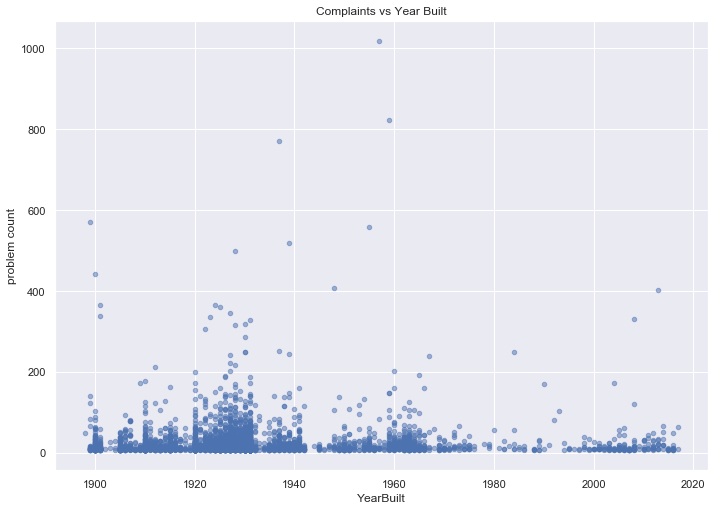

In [113]:
df_5[(df_5['problem count']<2000)&(df_5['YearBuilt']>1895)].plot.scatter(y='problem count', x='YearBuilt', alpha=0.5, title="Complaints vs Year Built")
#df_5[(df_5['count']>175)&(df_5['YearBuilt']>1895)].plot.scatter(y='count', x='YearBuilt', alpha=0.5, title="Top 40 Complaints by Year Built")

In [114]:
df_6 = pd.DataFrame(df_5)
df_6 = df_6.join(pd.get_dummies(df_6['decade']),how="inner")


## It looks like there were a lot more complaints for YearBuilt in 1920s
 - But there might just be a lot more buildings that were built then
 - Let's try to bin and normalize by year


Text(0.5, 1.0, 'Complaints by Binned Decade')

Text(0.5, 1.0, 'Average Complaints by Binned Decade')

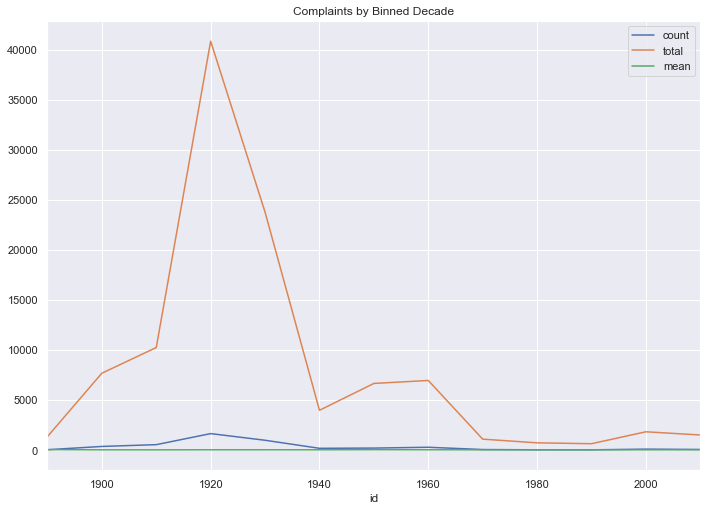

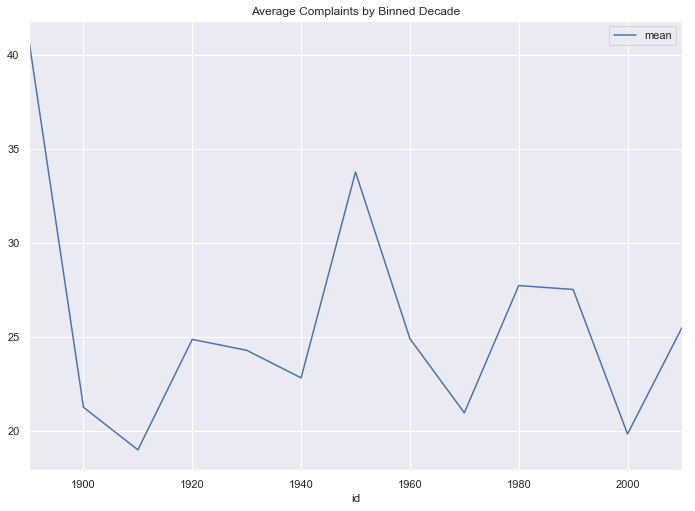

In [115]:

df_7 = pd.DataFrame([[2010,df_6[df_6[2010]==1].shape[0],df_6[df_6[2010]==1]['problem count'].sum(),df_6[df_6[2010]==1]['problem count'].mean()],
[2000,df_6[df_6[2000]==1].shape[0],df_6[df_6[2000]==1]['problem count'].sum(),df_6[df_6[2000]==1]['problem count'].mean()],
[1990,df_6[df_6[1990]==1].shape[0],df_6[df_6[1990]==1]['problem count'].sum(),df_6[df_6[1990]==1]['problem count'].mean()],
[1980,df_6[df_6[1980]==1].shape[0],df_6[df_6[1980]==1]['problem count'].sum(),df_6[df_6[1980]==1]['problem count'].mean()],
[1970,df_6[df_6[1970]==1].shape[0],df_6[df_6[1970]==1]['problem count'].sum(),df_6[df_6[1970]==1]['problem count'].mean()],
[1960,df_6[df_6[1960]==1].shape[0],df_6[df_6[1960]==1]['problem count'].sum(),df_6[df_6[1960]==1]['problem count'].mean()],
[1950,df_6[df_6[1950]==1].shape[0],df_6[df_6[1950]==1]['problem count'].sum(),df_6[df_6[1950]==1]['problem count'].mean()],
[1940,df_6[df_6[1940]==1].shape[0],df_6[df_6[1940]==1]['problem count'].sum(),df_6[df_6[1940]==1]['problem count'].mean()],
[1930,df_6[df_6[1930]==1].shape[0],df_6[df_6[1930]==1]['problem count'].sum(),df_6[df_6[1930]==1]['problem count'].mean()],
[1920,df_6[df_6[1920]==1].shape[0],df_6[df_6[1920]==1]['problem count'].sum(),df_6[df_6[1920]==1]['problem count'].mean()],
[1910,df_6[df_6[1910]==1].shape[0],df_6[df_6[1910]==1]['problem count'].sum(),df_6[df_6[1910]==1]['problem count'].mean()],
[1900,df_6[df_6[1900]==1].shape[0],df_6[df_6[1900]==1]['problem count'].sum(),df_6[df_6[1900]==1]['problem count'].mean()],
[1890,df_6[df_6[1890]==1].shape[0],df_6[df_6[1890]==1]['problem count'].sum(),df_6[df_6[1890]==1]['problem count'].mean()]
])


df_7.columns = ["year",'count','total','mean']
df_7.drop('year',inplace=True,axis=1)
df_7['id']=(pd.Series([2010,2000, 1990,1980,1970,1960,1950,1940,1930,1920,1910,1900,1890,1880]))
df_7.plot(x='id')
plt.title("Complaints by Binned Decade")

df_7.drop(['total','count'],axis=1).plot(x='id')
plt.title("Average Complaints by Binned Decade")


### Looking at Normalized Year Built
 - The initial suspicion that a lot of buildings were built in the 1920s holds true.
 - The worst decades for generating complaints were the 1890s and the 1950s
 - I'll add those totals to the df_6 Data Frame

In [116]:
df_6['2010t'] = df_6[2010] * df_6['problem count']
df_6['2000t'] = df_6[2000] * df_6['problem count']
df_6['1990t'] = df_6[1990] * df_6['problem count']
df_6['1980t'] = df_6[1980] * df_6['problem count']
df_6['1970t'] = df_6[1970] * df_6['problem count']
df_6['1960t'] = df_6[1960] * df_6['problem count']
df_6['1950t'] = df_6[1950] * df_6['problem count']
df_6['1940t'] = df_6[1940] * df_6['problem count']
df_6['1930t'] = df_6[1930] * df_6['problem count']
df_6['1920t'] = df_6[1920] * df_6['problem count']
df_6['1910t'] = df_6[1910] * df_6['problem count']
df_6['1900t'] = df_6[1900] * df_6['problem count']
df_6['1890t'] = df_6[1890] * df_6['problem count']

## Complaints vs Area of Building
 

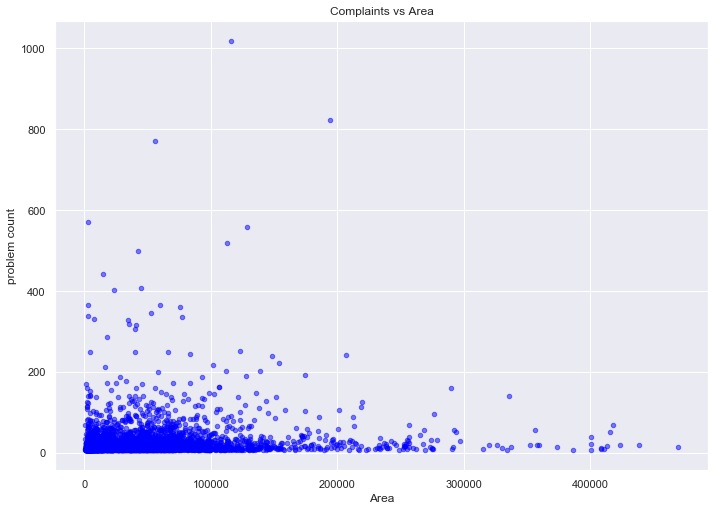

In [117]:
#
# Let's look at number of complaints vs total area of the building
# Area of the building looks like another indicator of complaints
#

df_5[(df_5['problem count']<2000)&(df_5['Area']<500000)].plot.scatter(y='problem count', x='Area',c='Blue', alpha=0.5, title="Complaints vs Area")
#df_5[(df_5['count']>175)&(df_5['Area']<500000)].plot.scatter(y='count', x='Area', c='Blue', alpha=0.5, title="Top 40 Complaints vs Area")


## Let's look at a correlation matrix to see how much effect some PLUTO data has on calls

In [118]:
#
# A simple correlation mtrix
#
print (df_6.columns)

def corr_matrix(alist,samples):
    corr =alist.head(samples).corr()
    sns.set(rc={'figure.figsize':(11.7,8.27)})

    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    );
    print("Correlation Matrix for top %d properties"%(samples))
    #print(corr)


Index([      'ZipCode',       'Address',       'LotArea',    'OfficeArea',
          'RetailArea',      'NumBldgs',     'NumFloors',      'LotDepth',
           'BldgDepth',     'YearBuilt',    'YearAlter1',      'BuiltFAR',
            'ResidFAR',       'CommFAR',      'FacilFAR',        'XCoord',
              'YCoord',          'Area',      'latitude',     'longitude',
       'problem count',        'decade',            1840,            1860,
                  1890,            1900,            1910,            1920,
                  1930,            1940,            1950,            1960,
                  1970,            1980,            1990,            2000,
                  2010,         '2010t',         '2000t',         '1990t',
               '1980t',         '1970t',         '1960t',         '1950t',
               '1940t',         '1930t',         '1920t',         '1910t',
               '1900t',         '1890t'],
      dtype='object')


Correlation Matrix for top 4372 properties
Shows 1920s '30s and '50s were worst for total calls


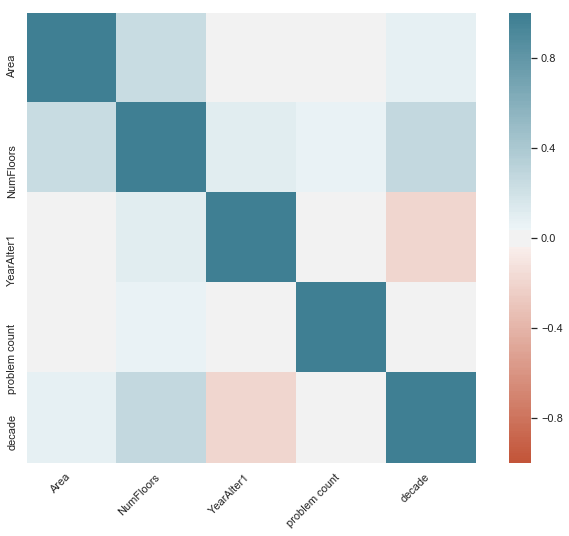

In [119]:
alist = df_5[['Area','NumFloors','YearBuilt','YearAlter1','problem count']]

alist = df_6[['Area','NumFloors','YearAlter1','problem count' ,'decade']]
corr_matrix(alist,df_5.shape[0])
print("Shows 1920s '30s and '50s were worst for total calls")


Correlation Matrix for top 40 properties
Shows 1990s had most complaints


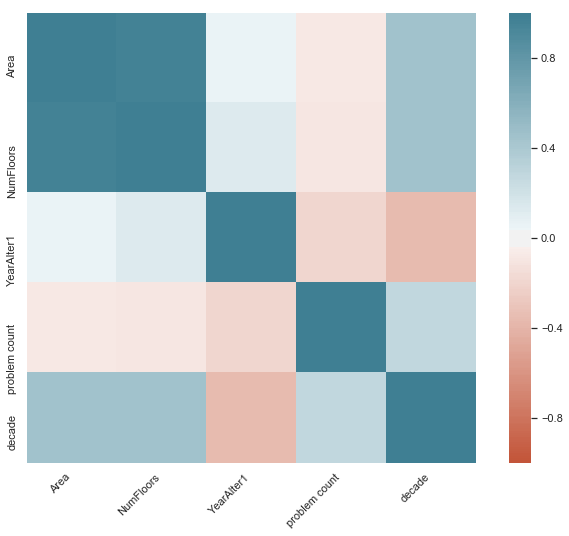

In [120]:
corr_matrix(alist,40)
print("Shows 1990s had most complaints")


Correlation Matrix for top 20 properties
Shows 1990s were worst for total calls


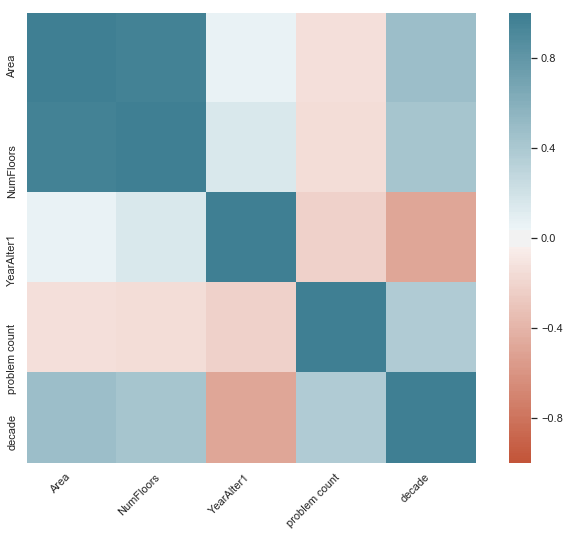

In [121]:
corr_matrix(alist,20)
print("Shows 1990s were worst for total calls")



Correlation Matrix for top 10 properties


,Area,NumFloors,YearAlter1,problem count,decade
32,199706.0,11.0,2007,8,1900
94,23329.0,6.0,0,8,1910
122,83646.0,6.0,2012,13,1920
133,4340.0,3.0,0,10,1930
140,4488.0,3.0,0,9,1910
150,6600.0,4.0,0,13,1930
157,400531.0,37.0,2004,7,1920
179,209819.0,17.0,0,32,1970
279,12500.0,5.0,0,10,1940
298,21350.0,6.0,2006,27,1900


Shows 1970s were worst for total calls


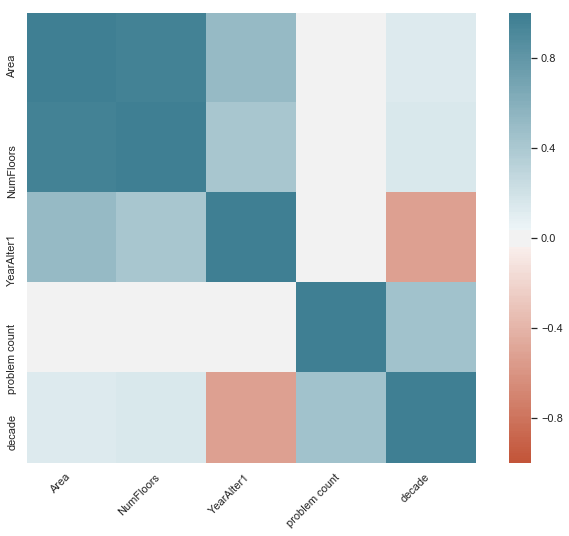

In [122]:
corr_matrix(alist,10)
alist.head(10)
print("Shows 1970s were worst for total calls")


In [123]:
alist.head()


,Area,NumFloors,YearAlter1,problem count,decade
32,199706.0,11.0,2007,8,1900
94,23329.0,6.0,0,8,1910
122,83646.0,6.0,2012,13,1920
133,4340.0,3.0,0,10,1930
140,4488.0,3.0,0,9,1910


## Really, there is very little correlation 
 - If you look at top 40, top 20, and top 10 we start to notice some things
 - The Area of the building, in the top 10 properties, and to some extent in the top 20 is a stong indicator of complaints.
 - But not so in the more general population
 - Therefore, no correlation could be found for features in the Pluto data for number of complaints
 - Will this correltion hold for years other than 2019?
 - We will need to investigate

### A map of NYC where everyone is complaining about heat and hotwater problems!
 - It could actually be a heat map, literally, because all these people complained about heat
 - I plotted the X/Y coordinate of each complaint just to see what it would look like

<Figure size 1080x720 with 0 Axes>

Distribution of Number of Complaints across NYC


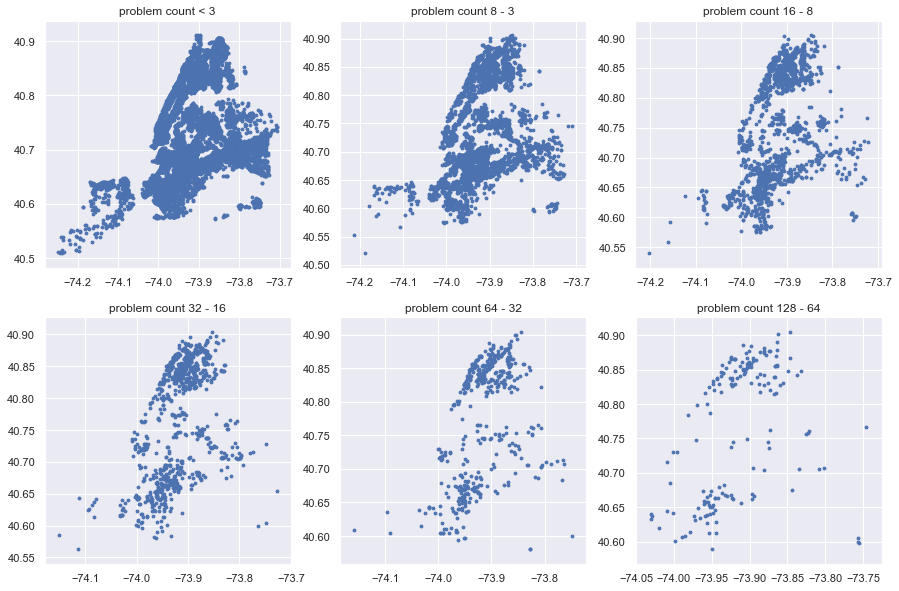

In [124]:
# Let's see the distribution of Number of Complaints

plt.figure(figsize=(15,10))
print ("Distribution of Number of Complaints across NYC")
for i in range(0,6):
    plot_vbl(230,i,'problem count',[3, 8, 16, 32,64,128],[le,le,le, le,le,le])



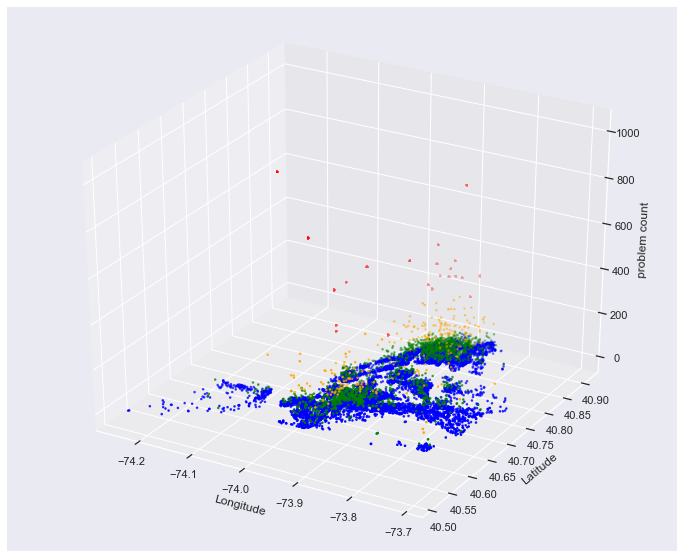

In [126]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


#
# A utility function to plot 3x2 maps of NYC
#


def plot_vbl_3D(vbl,limit,cmp, ms = [".",".",".","+",".",".","."".",".","."], colors = ['blue','green','orange','red','blue','green','orange','red']):

    eq=1
    lt=2
    ltt=3
    gt=4
    gtt=5
    le=8
    lee=9
    ge=16
    gee=17
    cmp1={eq:"=",lt:"-",ltt:"<",gt:"-",gtt:">",le:"-",lee:"=",ge:"-",gee:">="}
    cmp2={eq:"=",lt:"<",ltt:"<",gt:">",gtt:">",le:"<",lee:"=",ge:">",gee:">="}

    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111, projection='3d')    

    ax.set_ylabel('Latitude')
    ax.set_xlabel('Longitude')
    ax.set_zlabel(vbl)
    
    features = ['longitude','latitude',vbl]

    for i in range (0,len(limit)):
        v = limit[i]
        v2 = 0
        if (cmp[i] == eq):
            p_data = df_4[(df_4[vbl]==v)][features]

        if (cmp[i] == lt):
            if (i > 0):
                v2 = limit[i-1]
            else:
                v2 = 0
            p_data = df_4[(df_4[vbl]<v)&(df_4[vbl]>v2)][features]

        if (cmp[i] == gt):
            if ( i == len(xprs)-1):
                p_data = df_4[(df_4[vbl]>v)][features]
            else:    
                v2 = xprs[i+1]
                p_data = df_4[(df_4[vbl]>v)&(df_4[vbl]<v2)][features]

        if (cmp[i] == gtt):
            p_data = df_4[(df_4[vbl]>v)][features]

        if (cmp[i] == le):
            if (i > 0):
                v2 = limit[i-1]
            else:
                v2 = 0
            p_data = df_4[(df_4[vbl]<=v)&(df_4[vbl]>v2)][features]

        if (cmp[i] == ge):
            if ( i == len(limit)-1):
                p_data = df_4[(df_4[vbl]>=v)][features]
            else:    
                v2 = limit[i+1]
                p_data = df_4[(df_4[vbl]>=v)&(df_4[vbl]<v2)][features]

        if (cmp[i] == gee):
            p_data = df_4[(df_4[vbl]>=v)][features]

        if (cmp[i] == lee):
            p_data = df_4[(df_4[vbl]<=v)][features]
            
        if (cmp[i] == ltt):
            p_data = df_4[(df_4[vbl]<v)][features]
        
 #       print("I = %d, v=%d,v2=%d, ms=%s, vbl =%s"% (i,v,v2,ms[i],vbl))
 #       print(p_data.head())
   
        ax.scatter( p_data['longitude'], p_data['latitude'], p_data[vbl], marker=ms[i], s=10, color=colors[i])

    plt.show()

plot_vbl_3D('problem count',[2, 16, 64, 256],[ge,ge,ge, ge,ge,ge])


### This shows where the highest number of complaints came from, but also that there was a low number of complaints from across the city

<Figure size 1080x720 with 0 Axes>

Area distribution of Number of Complaints


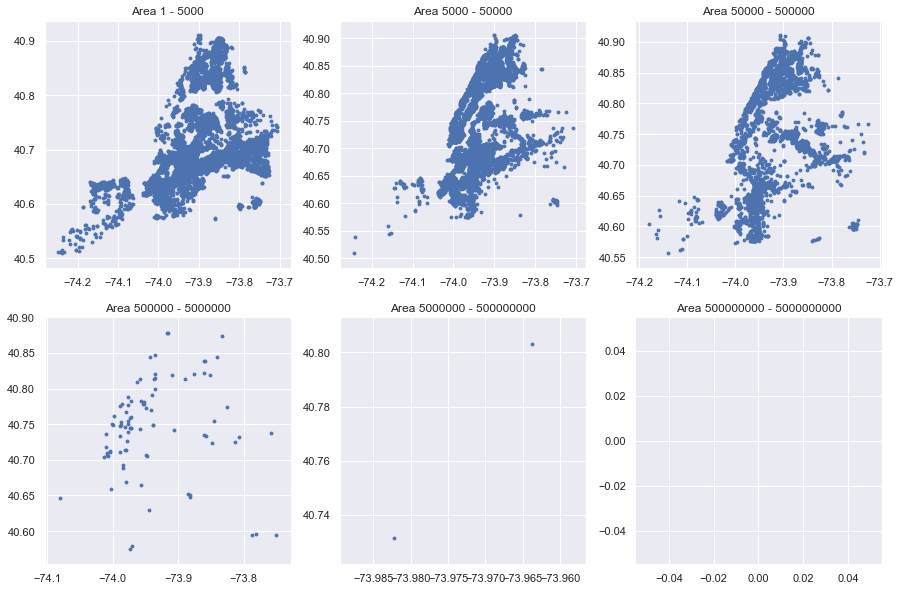

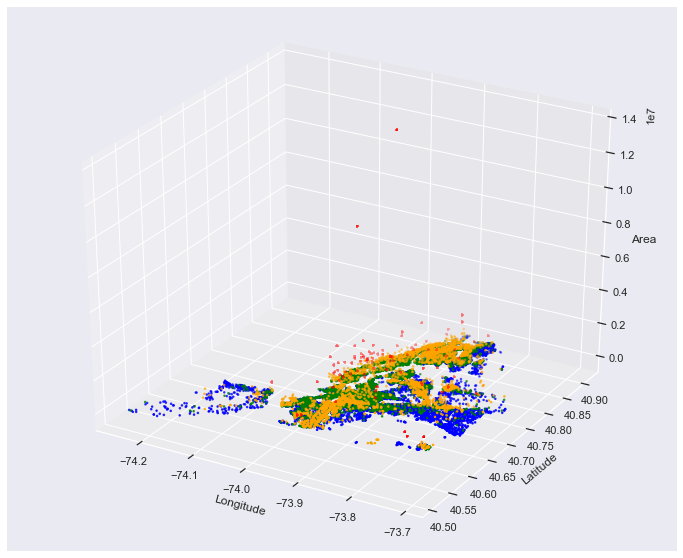

In [127]:
# Let's see the distribution of Area of building vs complaints

plt.figure(figsize=(15,10))
print ("Area distribution of Number of Complaints")

for i in range(0,6):
    plot_vbl(230,i,'Area',[1, 5000,50000,500000,5000000,500000000,5000000000],[ge,ge,ge, ge,ge,ge])

plot_vbl_3D('Area',[1, 5000,50000,500000],[ge,ge,ge, ge,ge,ge])


### This shows where the biggest area buildings were, but it's hard to show whether area is correlated to complaints based on this.

<Figure size 1080x720 with 0 Axes>

Distribution of total Number of Floors across NYC


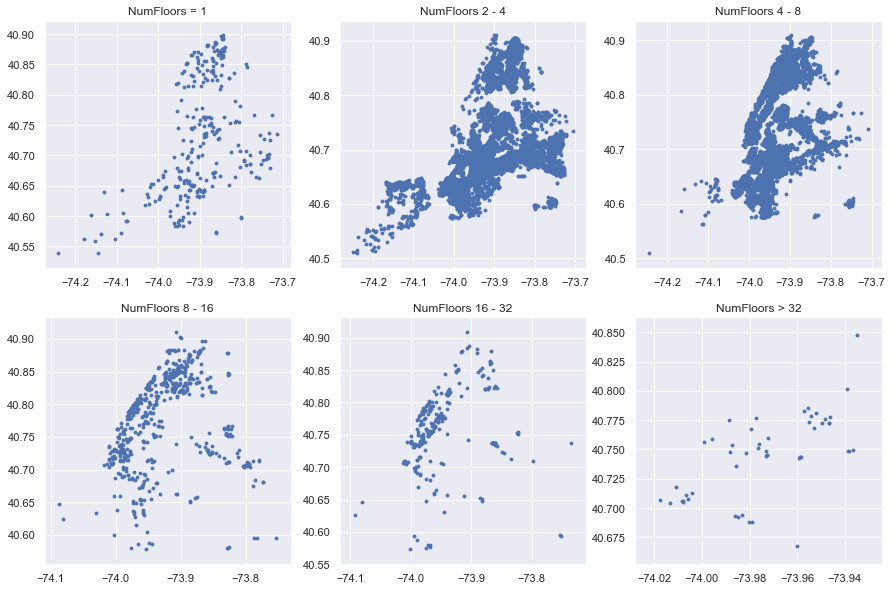

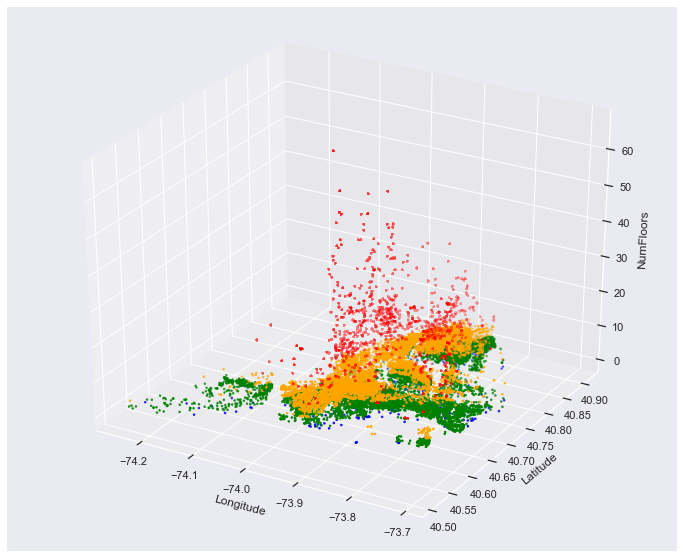

In [128]:
# Let's see the distribution of Number of Floors

plt.figure(figsize=(15,10))
print ("Distribution of total Number of Floors across NYC")

for i in range(0,6):
    plot_vbl(230,i,'NumFloors',[1,2,4, 8,16,32],[eq,ge,ge, ge,ge,ge])

plot_vbl_3D('NumFloors',[1,2,4, 8],[eq,ge,ge, ge,ge,ge])

### This shows where the tallest buildins are in terms of number of floors. But it doesnt' correlate visually with number of complaints.

<Figure size 1080x720 with 0 Axes>

Distribution of Year Built across NYC 1900-1960


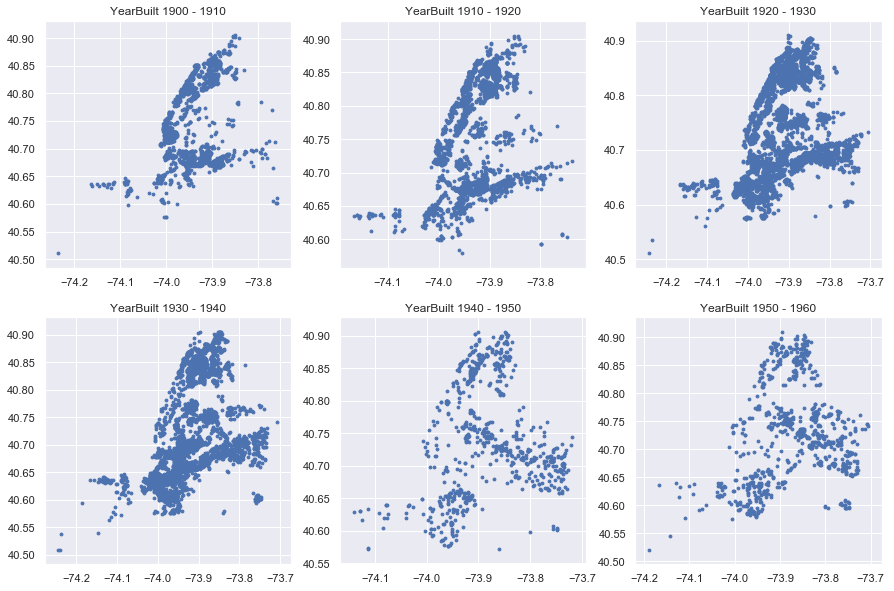

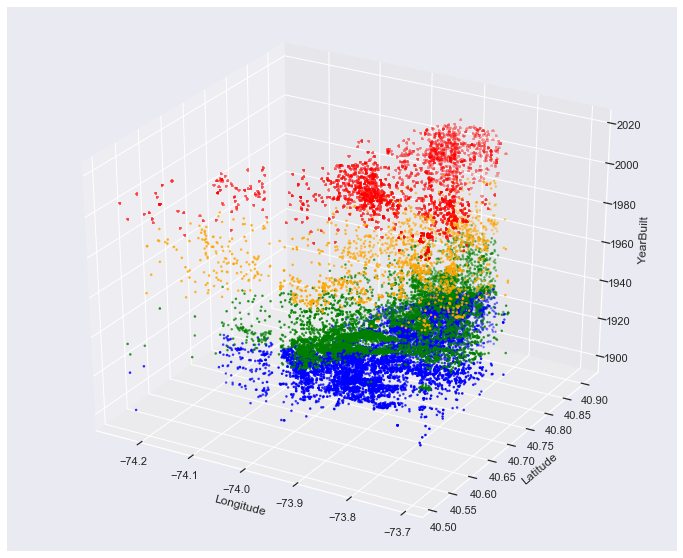

In [129]:
# Let's see the distribution of Year Built

plt.figure(figsize=(15,10))
print ("Distribution of Year Built across NYC 1900-1960")

for i in range(0,6):
    plot_vbl(230,i,'YearBuilt',[1900, 1910, 1920, 1930, 1940, 1950, 1960],[ge,ge,ge,ge,ge,ge])

plot_vbl_3D('YearBuilt',[1900, 1930, 1960, 1990],[ge,ge,ge,ge,ge,ge])    

### This shows where the age of buildings. But it doesnt' correlate visually with number of complaints.

<Figure size 1080x720 with 0 Axes>

Distribution of Year Built across NYC 1960-2019


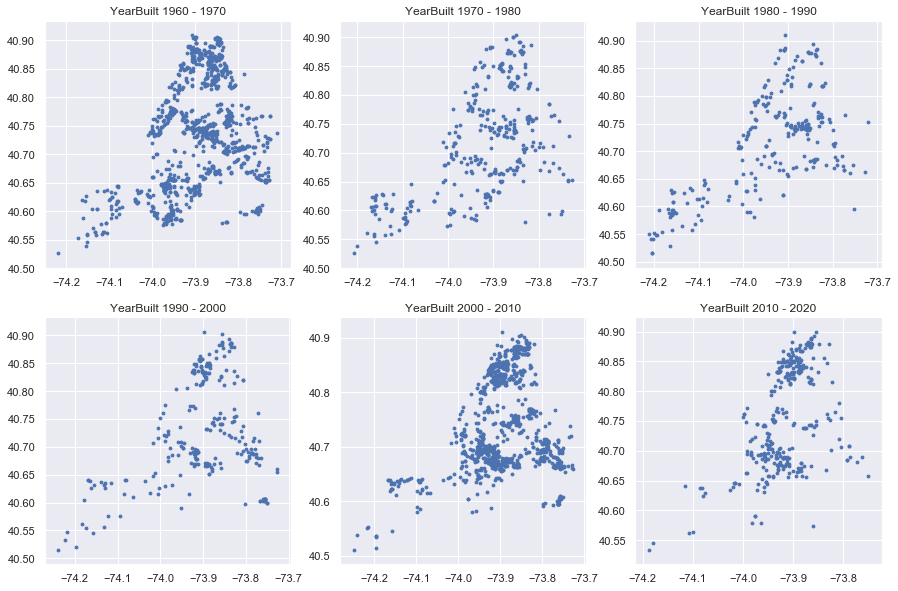

In [130]:
# Let's see the distribution of more Year Built

plt.figure(figsize=(15,10))
print ("Distribution of Year Built across NYC 1960-2019")

for i in range(0,6):
    plot_vbl(230,i,'YearBuilt',[1960, 1970, 1980, 1990, 2000, 2010, 2020],[ge,ge,ge,ge,ge,ge])


### This shows even more the age of buildings plots. But it doesnt' correlate visually with number of complaints.

## Let's plot on an actual map of NYC, where the most complaints are

In [132]:
import folium # map rendering library
#
# now attach the kmeans data to the original df_ten data frame so it can be displayed
#
colors = ['blue','green','yellow','orange','red','orange','purple', 'brown', 'pink', 'white', 'black']

centers = []

def plot_hot(limit):
    # Find the streets within each borough with the worst problems. Street names can repeat in different boroughs, and can be completely differnt streets~
    df_map = pd.DataFrame(df_5[['latitude','longitude','problem count']]).head(limit).sort_values(by="problem count")

    for index, row in df_map.iterrows():
        lati, lngi, cnt = row 

        if ( cnt > 8):
            color = 0
        if ( cnt >16):
            color = 1
        if ( cnt > 32):
            color = 2
        if ( cnt >64):
            color = 3

        color = color+1
#        print(color,index,cnt)
        label = 'Count:{}'.format(cnt)
        label = folium.Popup(label, parse_html=False)
        folium.CircleMarker(
            [lati, lngi],
            radius=3,
            popup=label,
            color=colors[color],
            fill=False,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_map)
        
    for row in centers:
        lati, lngi = row 
        label = ""
        label = folium.Popup(label, parse_html=False)
        folium.CircleMarker(
            [lati, lngi],
            radius=6,
            popup=label,
            color='blue',
            fill=False,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_map)
                
        
nyc = {'latitude':40.750742,'longitude':-73.79653}
map_map = folium.Map([nyc['latitude'], nyc['longitude']], zoom_start=11,  width='100%', height='100%')
plot_hot(600)
print("Map of top complaint properties")
map_map  
#map.save('map.html')




Map of top complaint properties


### That's the top 600 complaining properties. They seem to be clustered in certain areas.

## Let's run KMeans to find the location of clusters

In [133]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
limit = 600
data = np.array(df_5[['latitude','longitude']])[:limit]
x_train ,x_test = train_test_split(data,test_size=0.2) 

kmeans = KMeans(n_clusters=3, random_state=0).fit(x_train)
#kmeans.labels_
yhat = kmeans.predict(x_test)
centers = kmeans.cluster_centers_
map_map = folium.Map([nyc['latitude'], nyc['longitude']], zoom_start=11,  width='100%', height='100%')
plot_hot(limit)
map_map  


## And Let's run DBSCAN to locate the clusters

Estimated number of clusters: 10
Estimated number of noise points: 564


Text(0.5, 1.0, 'Estimated number of clusters: 10')

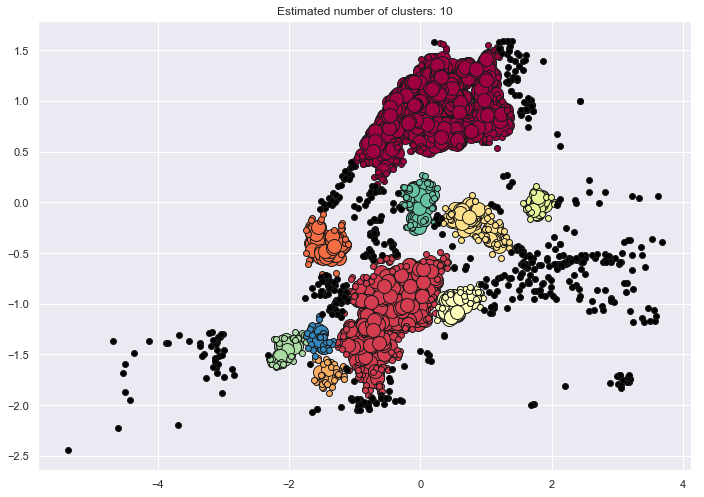

In [134]:
from sklearn.model_selection import train_test_split

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

data = np.array(df_5[['longitude','latitude']])

X = StandardScaler().fit_transform(data)

x_train ,x_test = train_test_split(X,test_size=0.2) 
db = DBSCAN(eps=0.16, min_samples=32).fit(X)
labels = db.labels_
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)



print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
#print("Adjusted Rand Index: %0.3f"
#      % metrics.adjusted_rand_score(labels_true, labels))
#print("Adjusted Mutual Information: %0.3f"
#      % metrics.adjusted_mutual_info_score(labels_true, labels,
#                                           average_method='arithmetic'))
#print("Silhouette Coefficient: %0.3f"
#      % metrics.silhouette_score(X, labels))

import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### Let's try to see what differentiates high complaint buildings from low complaint buildings
 - Start with a peak complaint period, find the 30 highest, and 75 lowest complaining buildins
 - Join them with PLUTO data to find features
 - Adjust the features as required
 

In [135]:
bad_days =       df[df['Fold']==2019]['SEQ'].value_counts()[0:5].reset_index()['index']
bad_properties = df[df['SEQ'].isin(bad_days)]['incident_address'].value_counts()[0:30].reset_index()['index']

good_properties = df[df['SEQ'].isin(bad_days)]['incident_address'].value_counts()[::150].reset_index()
good_properties = good_properties[good_properties['incident_address']==1]['index']

df[df['SEQ'].isin(bad_days)]['incident_address'].value_counts()[0:30].reset_index().sum()
good_properties.shape
df_g = pd.DataFrame(good_properties)
df_g['good']=1

df_b = pd.DataFrame(bad_properties)
df_b['good']=0

df_p= df_b.append(df_g)
df_p.set_index('index', inplace=True)

df_p = df_pluto.join(df_p, on="Address", how="inner")
print("total samples joined",df_p.shape[0], ", labeled as good",df_p[df_p['good']==1].shape[0],", labeled as bad",df_p[df_p['good']==0].shape[0])

index               89-21 ELMHURST AVENUE34 ARDEN STREET2090 EAST ...
incident_address                                                 1884
dtype: object

(64,)

total samples joined 62 , labeled as good 41 , labeled as bad 21


Area or Log of Area, which will be a better indicator?


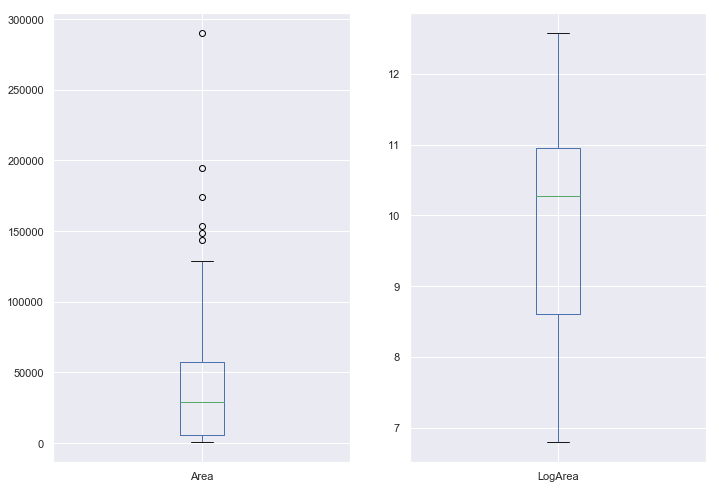

In [136]:
X = df_p.drop(['good','Address','ZipCode'],axis=1)## Drop the results column, as well as any categories
X['LogArea'] = np.log(X['Area'])
plt.subplot(122)
X['LogArea'].plot(kind="box")
plt.subplot(121)
X['Area'].plot(kind="box")
print("Area or Log of Area, which will be a better indicator?")

In [137]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df_p.drop(['good','Address','ZipCode'],axis=1)## Drop the results column, as well as any categories
X['Altered']=1
X.loc[X['YearAlter1'] == 0,['Altered']]=0
X['LogArea'] = np.log(X['Area'])
X['Decade'] = (X['YearBuilt']/10).astype('int') #let's bin some things into decades
#X = X.drop(['YearAlter1'],axis=1)
#X = X.drop(['Area'],axis=1)
X = X.drop(['YearBuilt'],axis=1)
y = np.array(df_p['good'])
labels = X.columns
class_names = ["bad","good"]

scaler = StandardScaler(copy=True, with_mean=True, with_std=False)

X = scaler.fit_transform(X)
#y = scaler.fit_transform(y)

X_Train, X_Test, y_train, y_test = train_test_split(X,y,test_size=0.25)




/Users/dtt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

1. feature 8 BuiltFAR (0.231008)
2. feature 14 Area (0.202424)
3. feature 16 LogArea (0.132730)
4. feature 5 LotDepth (0.094766)
5. feature 13 YCoord (0.072544)
6. feature 17 Decade (0.056550)
7. feature 0 LotArea (0.055578)
8. feature 9 ResidFAR (0.037666)
9. feature 6 BldgDepth (0.035288)
10. feature 11 FacilFAR (0.027108)
11. feature 4 NumFloors (0.017793)
12. feature 1 OfficeArea (0.015993)
13. feature 12 XCoord (0.014031)
14. feature 15 Altered (0.006522)
15. feature 10 CommFAR (0.000000)
16. feature 7 YearAlter1 (0.000000)
17. feature 3 NumBldgs (0.000000)
18. feature 2 RetailArea (0.000000)
[1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1]
[1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1]
Confusion matrix, without normalization
[[ 3  0]
 [ 2 11]]


<Figure size 432x432 with 0 Axes>

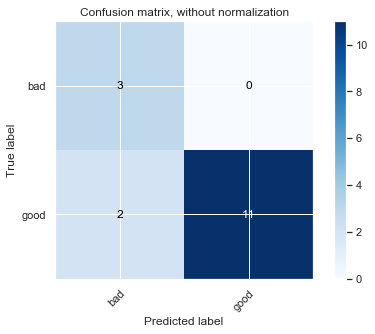

In [138]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(X_Train,y_train)
yhat = clf.predict(X_Test)

estimator = clf.estimators_[0]
#print(clf.estimators_)

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
#Print the feature ranking
i = 0
for f in range(X_Train.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1,  indices[f], labels[indices[f]], importances[indices[f]]))
    i = i + 1
#    if (i == 15):
#        break
        
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = labels,
                class_names = class_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

plt.rcParams["figure.figsize"] = [6.4, 4.8]

print(yhat)
print(y_test)
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test,yhat, classes=class_names,
                      title='Confusion matrix, without normalization')


plt.show()

In [139]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss

print ("F1 \t %f"% f1_score(y_test, yhat)) 
print ("Jaccard\t %f"% jaccard_score(y_test, yhat)) 
print ("Log Loss %f"% log_loss(y_test, yhat)) 



F1 	 0.916667
Jaccard	 0.846154
Log Loss 4.317347


### an example of a decision tree visualization
![Decision Tree](./decision_treex.jpg)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

[1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1]
[1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1]
Confusion matrix, without normalization
[[ 3  0]
 [ 2 11]]


<Figure size 432x432 with 0 Axes>

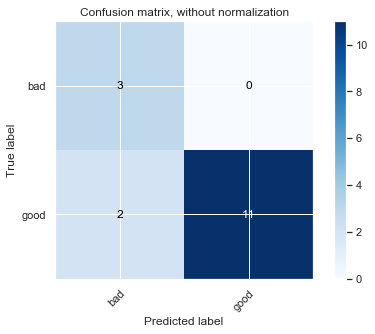

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#clf = RandomForestClassifier(n_jobs=100, random_state=0)
clf = svm.SVC(gamma='scale')

clf.fit(X_Train,y_train)
yhat = clf.predict(X_Test)

print(yhat)
print(y_test)
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, yhat, classes=class_names,
                      title='Confusion matrix, without normalization')


In [141]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss

print ("F1 \t %f"% f1_score(y_test, yhat)) 
print ("Jaccard\t %f"% jaccard_score(y_test, yhat)) 
print ("Log Loss %f"% log_loss(y_test, yhat)) 



F1 	 0.916667
Jaccard	 0.846154
Log Loss 4.317347


# Findings

PLUTO data does not match all of the buildings in the complaint data  
 - That's because the 311 call address might be slightly different than the reported address in PLUTO
 - We *could* fix that, but it would be time consuming
 - So, we're just going to ignore the addresses that are not in PLUTO for this part
 
PLUTO data ResArea and LotArea
 - one or the other is often zero. 
 - So pick one or the other non-zero value and save it to a new field called Area
 
PLUTO YearBuilt is too fine grained
 - Create new feature DecadeBuilt
 - Also, YearBuilt can be misleading because so many buildings were built in the 1920s

PLUTO AlterDate1 has a lot of zeros
 - Deal with the zero data by simply adding an indicator (new feature) showing if the building had been altered or not 

PLUTO correlations on the top 10 or 20 properties don't show much
 - The Decade a buiding was built might indicate whether it will be a problem building

Plots of Lat/Lng data
 - These plots help visualize the problem areas in the city
 - The 3D plots are an aid and show color coded areas of potential concern

Maps of City
 - Buildings with low numbers of complaints (<7) are spead fairly evenly across the city and make up about 80% of the buildings and 50% of the calls.
 - Buildings with high numbers of complaints (>=7) are generally located in Harlem and central Brooklyn and make up 50% of the calls, but only 20% of the building
 - Buildings with very high call numbers appear in various locations throughout the city. They seem unrelated to each other.
 - Cluster analysis using KMeans accurately shows the main areas in the city that report problems.
 - Cluster analysis using DBSCAN is entertaining

PLUTO data can be used to show features of high call building vs low call buildings. The important features are the area of the building, which might indicate the size of population, the decade the building was built in, and the XY location of the building. Also, whether there was retail space seems to be a factor as well.

Random Forest analysis accurately predicts non-problem properties, and does a pretty good job of predicting problem properties, as shown in a confusion matrix diagram.

Support Vector Machine (SVM) analysis was less accurate in predicting outcomes than Random Forest.
 